In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline

# sns.set(context='notebook', style='whitegrid', font_scale=1.2)
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Load the data

In [17]:
# Main DataFrame (df)
df = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/movies', index_col=0)
df.head()

domestic   worldwide  \
title                                               
Alice in Wonderland         334191110  1025467110   
Iron Man 2                  312433331   623933331   
The Twilight Saga: Eclipse  300531751   698491347   
Inception                   292576195   826137188   
Despicable Me               251513985   543113985   

                                                    distributor      opening  \
title                                                                          
Alice in Wonderland         Walt Disney Studios Motion Pictures  116101023.0   
Iron Man 2                                   Paramount Pictures  128122480.0   
The Twilight Saga: Eclipse                 Summit Entertainment   64832191.0   
Inception                                          Warner Bros.   62785337.0   
Despicable Me                                Universal Pictures   56397125.0   

                                 budget        date  runtime  widest rating  \
title                                                                         
Alice in Wonderland         200000000.0  2010-03-05    108.0  3739.0     PG   
Iron Man 2                  200000000.0  2010-05-07    124.0  4390.0  PG-13   
The Twilight Saga: Eclipse   68000000.0  2010-06-30    124.0  4468.0  PG-13   
Inception                   160000000.0  2010-07-16    148.0  3792.0  PG-13   
Despicable Me                69000000.0  2010-07-09     95.0  3602.0     PG   

                                                                       genres  
title                                                                          
Alice in Wonderland                        ['Adventure', 'Family', 'Fantasy']  
Iron Man 2                                  ['Action', 'Adventure', 'Sci-Fi']  
The Twilight Saga: Eclipse  ['Action', 'Adventure', 'Drama', 'Fantasy', 'R...  
Inception                       ['Action', 'Adventure', 'Sci-Fi', 'Thriller']  
Despicable Me               ['Animation', 'Comedy', 'Crime', 'Family', 'Fa...

In [16]:
# Quantitative DataFrame (df_num)
df_num = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/movies_num', index_col=0)
df_num.head()

worldwide   domestic      opening       budget  \
title                                                                         
Alice in Wonderland         1025467110  334191110  116101023.0  200000000.0   
Iron Man 2                   623933331  312433331  128122480.0  200000000.0   
The Twilight Saga: Eclipse   698491347  300531751   64832191.0   68000000.0   
Inception                    826137188  292576195   62785337.0  160000000.0   
Despicable Me                543113985  251513985   56397125.0   69000000.0   

                            runtime  widest  
title                                        
Alice in Wonderland           108.0  3739.0  
Iron Man 2                    124.0  4390.0  
The Twilight Saga: Eclipse    124.0  4468.0  
Inception                     148.0  3792.0  
Despicable Me                  95.0  3602.0

In [19]:
# Distributor DataFrame (df_distributor)
df_distributor = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/distributor', index_col=0)
df_distributor.head()

ATO Pictures  Affirm Films  Anchor Bay Films  \
title                                                                      
Alice in Wonderland                    0             0                 0   
Iron Man 2                             0             0                 0   
The Twilight Saga: Eclipse             0             0                 0   
Inception                              0             0                 0   
Despicable Me                          0             0                 0   

                            Annapurna Pictures  Apparition  Aviron Pictures  \
title                                                                         
Alice in Wonderland                          0           0                0   
Iron Man 2                                   0           0                0   
The Twilight Saga: Eclipse                   0           0                0   
Inception                                    0           0                0   
Despicable Me                                0           0                0   

                            BH Tilt  Bleecker Street Media  \
title                                                        
Alice in Wonderland               0                      0   
Iron Man 2                        0                      0   
The Twilight Saga: Eclipse        0                      0   
Inception                         0                      0   
Despicable Me                     0                      0   

                            Broad Green Pictures  CBS Films  ...  \
title                                                        ...   
Alice in Wonderland                            0          0  ...   
Iron Man 2                                     0          0  ...   
The Twilight Saga: Eclipse                     0          0  ...   
Inception                                      0          0  ...   
Despicable Me                                  0          0  ...   

                            Summit Entertainment  The Samuel Goldwyn Company  \
title                                                                          
Alice in Wonderland                            0                           0   
Iron Man 2                                     0                           0   
The Twilight Saga: Eclipse                     1                           0   
Inception                                      0                           0   
Despicable Me                                  0                           0   

                            The Weinstein Company  TriStar Pictures  \
title                                                                 
Alice in Wonderland                             0                 0   
Iron Man 2                                      0                 0   
The Twilight Saga: Eclipse                      0                 0   
Inception                                       0                 0   
Despicable Me                                   0                 0   

                            Twentieth Century Fox  United Artists Releasing  \
title                                                                         
Alice in Wonderland                             0                         0   
Iron Man 2                                      0                         0   
The Twilight Saga: Eclipse                      0                         0   
Inception                                       0                         0   
Despicable Me                                   0                         0   

                            Universal Pictures  Vivendi Entertainment  \
title                                                                   
Alice in Wonderland                          0                      0   
Iron Man 2                                   0                      0   
The Twilight Saga: Eclipse                   0                      0   
Inception                                    0     

In [20]:
# MPAA Rating DataFrame (df_rating)
df_rating = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/rating', index_col=0)
df_rating.head()

PG  PG-13  R
title                                   
Alice in Wonderland          1      0  0
Iron Man 2                   0      1  0
The Twilight Saga: Eclipse   0      1  0
Inception                    0      1  0
Despicable Me                1      0  0

In [21]:
#Genres DataFrame (df_genres)
df_genres = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/genres', index_col=0)
df_genres.head()

Action  Adventure  Animation  Biography  Comedy  \
title                                                                         
Alice in Wonderland              0          1          0          0       0   
Iron Man 2                       1          1          0          0       0   
The Twilight Saga: Eclipse       1          1          0          0       0   
Inception                        1          1          0          0       0   
Despicable Me                    0          0          1          0       1   

                            Crime  Documentary  Drama  Family  Fantasy  ...  \
title                                                                   ...   
Alice in Wonderland             0            0      0       1        1  ...   
Iron Man 2                      0            0      0       0        0  ...   
The Twilight Saga: Eclipse      0            0      1       0        1  ...   
Inception                       0            0      0       0        0  ...   
Despicable Me                   1            0      0       1        1  ...   

                            Horror  Music  Musical  Mystery  Romance  Sci-Fi  \
title                                                                          
Alice in Wonderland              0      0        0        0        0       0   
Iron Man 2                       0      0        0        0        0       1   
The Twilight Saga: Eclipse       0      0        0        0        1       0   
Inception                        0      0        0        0        0       1   
Despicable Me                    0      0        0        0        0       0   

                            Sport  Thriller  War  Western  
title                                                      
Alice in Wonderland             0         0    0        0  
Iron Man 2                      0         0    0        0  
The Twilight Saga: Eclipse      0         1    0        0  
Inception                       0         1    0        0  
Despicable Me                   0         0    0        0  

[5 rows x 21 columns]

In [24]:
# Release Season (date) DataFrame (df_season)
df_season = pd.read_csv('/Users/diegoduque/Library/Mobile Documents/com~apple~CloudDocs/Metis/NBM_Regression_Student-main/Project2_Metis/data/season', index_col=0)
df_season.head()

spring  summer  winter
title                                             
Alice in Wonderland              1       0       0
Iron Man 2                       1       0       0
The Twilight Saga: Eclipse       0       1       0
Inception                        0       1       0
Despicable Me                    0       1       0

## Baseline linear regression

For quantitative values

In [25]:
df_num.head()

worldwide   domestic      opening       budget  \
title                                                                         
Alice in Wonderland         1025467110  334191110  116101023.0  200000000.0   
Iron Man 2                   623933331  312433331  128122480.0  200000000.0   
The Twilight Saga: Eclipse   698491347  300531751   64832191.0   68000000.0   
Inception                    826137188  292576195   62785337.0  160000000.0   
Despicable Me                543113985  251513985   56397125.0   69000000.0   

                            runtime  widest  
title                                        
Alice in Wonderland           108.0  3739.0  
Iron Man 2                    124.0  4390.0  
The Twilight Saga: Eclipse    124.0  4468.0  
Inception                     148.0  3792.0  
Despicable Me                  95.0  3602.0

In [28]:
sns.pairplot(df_num).savefig("./charts/pairplot.png", bbox_inches='tight')
#plt.savefig("./charts/pairplot.png",dpi=fig.dpi,bbox_inches='tight')

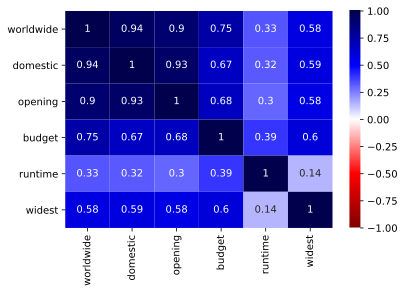

In [63]:
sns.heatmap(df_num.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1)
plt.savefig("./charts/big_heat_map.png")

In [29]:
X = df_num[["domestic", "opening", "budget", "runtime", "widest"]]
y = df_num["worldwide"]

In [30]:
lr = LinearRegression()
lr.fit(X, y) 
lr.score(X, y) 

0.916832050002683

This number is too high. Let's remove domestic and opening, because they are very correlated to worldwide

In [31]:
X = df_num[["budget", "runtime", "widest"]]
y = df_num["worldwide"]

In [32]:
lr = LinearRegression()
lr.fit(X, y) 
lr.score(X, y) 

0.5872906025033997

Let's try removing widest release

In [38]:
X = df_num[["budget", "runtime"]]
y = df_num["worldwide"]

In [34]:
lr = LinearRegression()
lr.fit(X, y) 
lr.score(X, y) 

0.5581156416952192

There is not a huge difference so let's keep Widest Release.

In [40]:
X = df_num[["budget", "runtime", "widest"]]
y = df_num["worldwide"]

In [36]:
lr = LinearRegression()
lr.fit(X, y) 
lr.score(X, y) 

0.5872906025033997

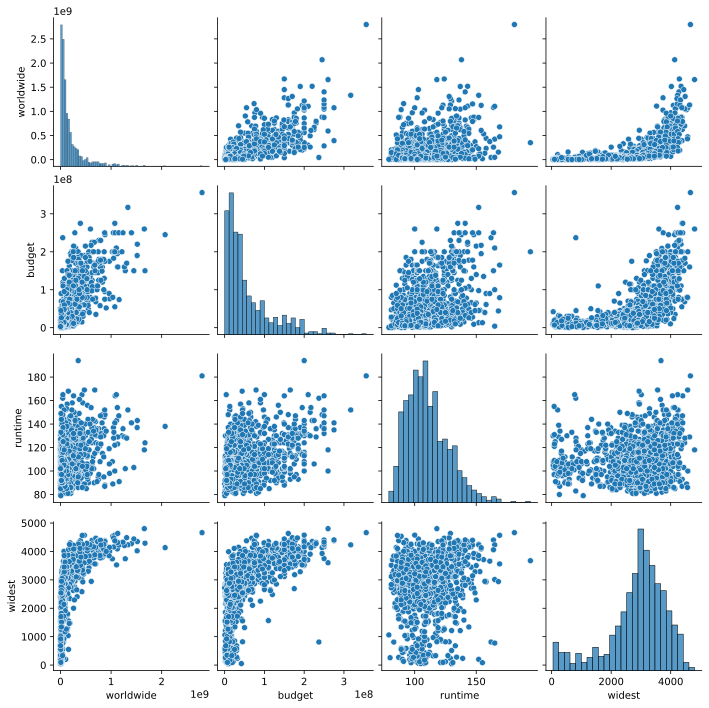

In [59]:
df_small = df_num.loc[:,["worldwide", "budget", "runtime", "widest"]]

sns.pairplot(df_small).savefig("./charts/pairplot_small.png", bbox_inches='tight')
#plt.savefig("./charts/pairplot.png",dpi=fig.dpi,bbox_inches='tight')

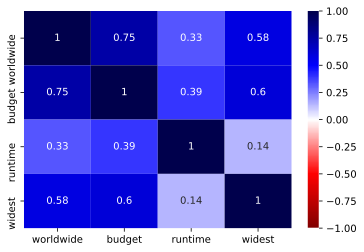

In [64]:
sns.heatmap(df_small.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1)
plt.savefig("./charts/small_heat_map.png")

## OLS

In [41]:
model = sm.OLS(y, sm.add_constant(X)) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              worldwide   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     544.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          7.74e-220
Time:                        23:56:09   Log-Likelihood:                -23454.
No. Observations:                1151   AIC:                         4.692e+04
Df Residuals:                    1147   BIC:                         4.694e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.516e+08   3.93e+07     -6.396      0.000   -3.29e+08   -1.74e+08
budget         2.7531      0.121     22.727      0.000       2.515       2.991
runtime      1.11e+06   3.27e+05      3.396      0.001    4.69e+05    1.75e+06
widest      5.859e+04   6506.779      9.005      0.000    4.58e+04    7.14e+04
==============================================================================
Omnibus:                      664.497   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10855.225
Skew:                           2.321   Prob(JB):                         0.00
Kurtosis:                      17.311   Cond. No.                     6.27e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Train, test, and split 

In [42]:
X = df_num[["budget", "runtime", "widest"]]
y = df_num["worldwide"]

In [43]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [44]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.5798734283247353

# Feature Engineering

## Polynomial

In [45]:
X = df_num[["budget", "runtime", "widest"]]
y = df_num["worldwide"]

In [46]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) 

In [49]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

X_val_poly = poly.transform(X_val)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [50]:
lr_poly.score(X_val_poly, y_val) 

0.7558939139492149

In [51]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [52]:
lr_poly.coef_

array([ 0.00000000e+00, -6.47141170e+00,  6.32172500e+02, -1.04177525e+05,
        5.41423805e-09,  1.68676261e-02,  1.38473898e-03,  5.59647719e+03,
       -3.64352593e+02,  4.49106892e+01])

In [53]:
poly

PolynomialFeatures()

# Simple Validation Method: Train, Validation, and Test

In [54]:
X = df_num[["budget", "runtime", "widest"]]
y = df_num["worldwide"]

In [55]:
# test/val/train = 60/20/20
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) 

In [56]:
##set up the 3 models we're choosing from:

lr = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_reg = Ridge(alpha=60)  # TUNED this! 
                        ## tried but R^2 only went up 0.001 from 0.305 to 0.306(when change alpha from 1 to 60) 

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2)  # simpler is better

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lr_poly = LinearRegression()

In [57]:
#validate

lr.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lr.score(X_val, y_val):.3f}')

lr_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lr_reg.score(X_val_scaled, y_val):.3f}')

lr_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lr_poly.score(X_val_poly, y_val):.3f}')  

Linear Regression val R^2: 0.633
Ridge Regression val R^2: 0.639
Degree 2 polynomial regression val R^2: 0.756
